<a href="https://colab.research.google.com/github/SerDavidE/HouseClassify/blob/main/Predicting_Housing_Prices_Phase_1_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Chapter_7_Supervised_Machine_Learning/Classification/housing-classification-iter6.csv'
housing_data = pd.read_csv(file_path)

In [8]:
# Reading the data description file
data_description_path = '/content/drive/MyDrive/Colab Notebooks/Chapter_7_Supervised_Machine_Learning/data_description.txt'

# Displaying the first few lines of the data description
with open(data_description_path, 'r') as file:
    data_description = file.readlines()

# Show the first 20 lines to get an idea of the content
data_description[:20]

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n']

In [9]:
# Checking for missing values in each column
missing_values = housing_data.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Splitting the data into features and target
X = housing_data.drop('Expensive', axis=1)
y = housing_data['Expensive']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Creating numerical transformer with mean imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creating categorical transformer with most frequent imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating pipeline for KNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

# Creating pipeline for Decision Tree
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

# Fitting and evaluating KNN pipeline
knn_pipeline.fit(X_train, y_train)
knn_predictions = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Fitting and evaluating Decision Tree pipeline
dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

knn_accuracy, dt_accuracy

(0.9383561643835616, 0.934931506849315)

In [11]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune for KNN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2] # manhattan_distance and euclidean_distance
}

# Grid search with KNN pipeline
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Best hyperparameters for KNN
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

knn_best_params, knn_best_score

({'classifier__n_neighbors': 7,
  'classifier__p': 1,
  'classifier__weights': 'distance'},
 0.9366494259198122)

In [12]:
# Hyperparameters to tune for Decision Tree
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Grid search with Decision Tree pipeline
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)

# Best hyperparameters for Decision Tree
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_

dt_best_params, dt_best_score

({'classifier__criterion': 'gini',
  'classifier__max_depth': 10,
  'classifier__min_samples_split': 10},
 0.9289497817394812)

0.9383561643835616

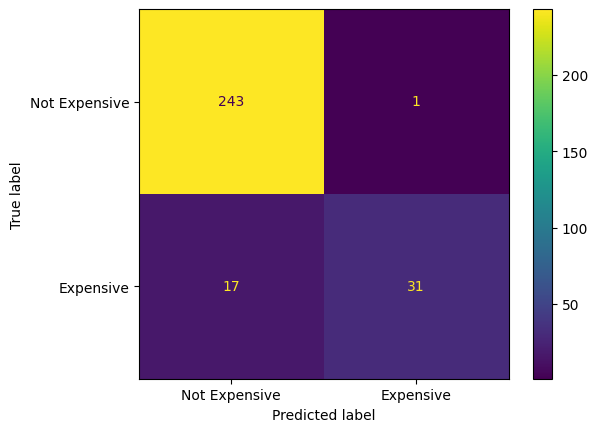

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Test accuracy for KNN using best hyperparameters
knn_test_accuracy = accuracy_score(knn_grid_search.predict(X_test), y_test)


# Plotting the confusion matrix for the test set predictions
confusion_mat = confusion_matrix(y_test, knn_grid_search.predict(X_test))
display_labels = ["Not Expensive", "Expensive"]
cm_display = ConfusionMatrixDisplay(confusion_mat, display_labels=display_labels).plot()

knn_test_accuracy

0.9178082191780822

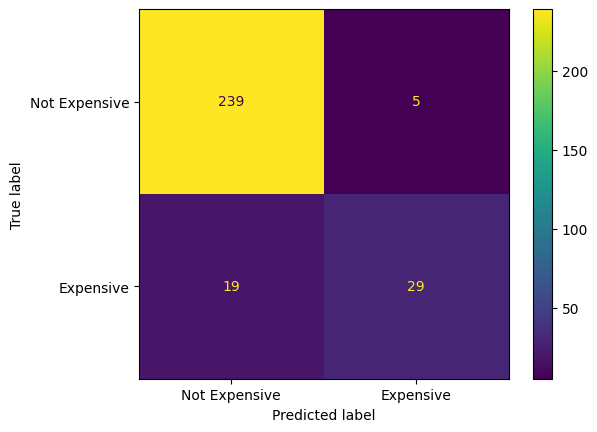

In [14]:
# Test accuracy for Decision Tree using best hyperparameters
dt_test_accuracy = accuracy_score(dt_grid_search.predict(X_test), y_test)

# Plotting the confusion matrix for the test set predictions
confusion_mat = confusion_matrix(y_test, dt_grid_search.predict(X_test))
display_labels = ["Not Expensive", "Expensive"]
cm_display = ConfusionMatrixDisplay(confusion_mat, display_labels=display_labels).plot()

dt_test_accuracy

In [15]:
from sklearn.linear_model import LogisticRegression

# Creating pipeline for Logistic Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# Fitting and evaluating Logistic Regression pipeline
lr_pipeline.fit(X_train, y_train)
lr_predictions = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

lr_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9452054794520548

In [16]:
from sklearn.svm import SVC

# Creating pipeline for Support Vector Machine
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42))])

# Fitting and evaluating SVM pipeline
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_accuracy

0.9417808219178082

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Creating pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Fitting and evaluating Random Forest pipeline
rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

rf_accuracy

0.952054794520548

In [18]:
# Multi-classifier pipeline
MC_full_pipeline = Pipeline([('preprocessor', preprocessor),
                             ('classifier', None)])

# Multi-classifier parameter grid
MC_param_grid = [
    {
        'classifier': [DecisionTreeClassifier(random_state=42)],
        "preprocessor__num__imputer__strategy": ["mean", "median"],
        "classifier__max_depth": range(2, 14, 3),
        "classifier__min_samples_leaf": range(3, 12, 3)
    },
    {
        'classifier': [KNeighborsClassifier()],
        "preprocessor__num__imputer__strategy": ["mean", "median"],
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    {
        'classifier': [LogisticRegression(random_state=42)],
        "preprocessor__num__imputer__strategy": ["mean", "median"],
        'classifier__C': [0.1, 1.0, 10.0]
    },
    {
        'classifier': [SVC(random_state=42)],
        "preprocessor__num__imputer__strategy": ["mean", "median"],
        'classifier__C': [0.1, 1.0, 10.0]
    },
    {
        'classifier': [RandomForestClassifier(random_state=42)],
        "preprocessor__num__imputer__strategy": ["mean", "median"],
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    }
]

# Grid Search with multiple classifiers
MC_search = GridSearchCV(MC_full_pipeline,
                         MC_param_grid,
                         cv=5,
                         scoring='accuracy',
                         verbose=1)

# Fitting the Grid Search
MC_search.fit(X_train, y_train)

# Best parameters and model
MC_best_params = MC_search.best_params_
MC_best_model = MC_search.best_estimator_
MC_best_score = MC_search.best_score_

MC_best_params, MC_best_score

Fitting 5 folds for each of 116 candidates, totalling 580 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

({'classifier': RandomForestClassifier(random_state=42),
  'classifier__max_depth': None,
  'classifier__min_samples_split': 2,
  'classifier__n_estimators': 100,
  'preprocessor__num__imputer__strategy': 'median'},
 0.9529070833791863)

# Tunning RandomForest

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Splitting the data into features and target
X = housing_data.drop('Expensive', axis=1)
y = housing_data['Expensive']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessor
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

In [21]:
# Random Forest Classifier pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Finer grid of hyperparameters
param_grid_finer = {
    'classifier__n_estimators': [90, 100, 110],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__max_features': ['sqrt'],
    'classifier__min_samples_leaf': [1, 2, 3],
    'preprocessor__num__imputer__strategy': ['mean', 'median']
}

# Grid Search with Random Forest Classifier
grid_search_finer = GridSearchCV(rf_pipeline, param_grid_finer, cv=5, scoring='accuracy', verbose=1)
grid_search_finer.fit(X_train, y_train)

# Best parameters and model
best_params_finer = grid_search_finer.best_params_
best_model_finer = grid_search_finer.best_estimator_
best_score_finer = grid_search_finer.best_score_

best_params_finer, best_score_finer


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


({'classifier__max_depth': 10,
  'classifier__max_features': 'sqrt',
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 4,
  'classifier__n_estimators': 90,
  'preprocessor__num__imputer__strategy': 'median'},
 0.9537654524778988)

In [23]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with the best parameters from the first set
final_rf_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=100,
    random_state=42)

# Create a pipeline with the final Random Forest model
num_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', num_transformer_final, num_cols),
        ('cat', cat_transformer, cat_cols)])

final_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_final),
                                    ('classifier', final_rf_model)])

# Fit the pipeline to the training data
final_rf_pipeline.fit(X_train, y_train)

# Evaluate the final model on the test set
final_predictions = final_rf_pipeline.predict(X_test)
final_accuracy_2 = accuracy_score(y_test, final_predictions)

final_accuracy_2

0.9452054794520548

In [24]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier with the best parameters from the first set
final_rf_model = RandomForestClassifier(
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=90,
    random_state=42)

# Create a pipeline with the final Random Forest model
num_transformer_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', num_transformer_final, num_cols),
        ('cat', cat_transformer, cat_cols)])

final_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_final),
                                    ('classifier', final_rf_model)])

# Fit the pipeline to the training data
final_rf_pipeline.fit(X_train, y_train)

# Evaluate the final model on the test set
final_predictions = final_rf_pipeline.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

final_accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9452054794520548